# $$
\text{Corrigé du devoir à la maison N°1}
$$

## I. Le modèle de Leontieff

1.a. Écrire une fonction *Matrice* qui prend en entrée un entier $N \geq 1$ et fournit en sortie une matrice $A \in \mathcal{M}_N(\mathbb{R})$ dont les coefficients sont positifs.

In [1]:
import numpy as np
def Matrice(n):
    A = n*np.random.rand(n,n)
    return np.absolute(A);
# Test de la fonction matrice
A = Matrice(6)
print('A =',A,'\n')

A = [[5.85786556 0.61303648 4.52090358 2.03177683 0.62978822 5.89720262]
 [2.69656726 1.75815332 1.71275698 2.37742761 2.91659346 5.65782428]
 [0.10782103 4.6899909  4.51249062 2.22325384 0.18035034 5.39359047]
 [4.48214937 3.32381283 4.64466835 3.44518385 1.83909181 2.27739648]
 [1.3821312  4.45622808 1.27351476 5.10323411 2.69662888 1.57952024]
 [2.77354158 0.93403913 4.40600941 1.15803945 2.35957502 2.87355323]] 



b. Écrire une fonction *rho* qui donne une valeur approchée du rayon spectral d'une matrice carrée $A \in \mathcal{M}_N(\mathbb{R})$.

In [2]:
def rho(A):
    V = np.linalg.eigvals(A)
    W = np.absolute(V)
    return np.max(W);
print('rho(A) =',rho(A),'\n')

rho(A) = 17.228769811818573 



c. Écrire une fonction *MatrProd* qui renvoie une matrice $A \in \mathcal{M}_N(\mathbb{R})$ dont les coefficients sont positifs, telle que la matrice $B = I_N - A$ soit productive et que son conditionnement soit inférieur ou égal à un nombre réel $\delta > 1$.

In [3]:
def MatrProd(N, d):
    A = Matrice(N)
    r = rho(A)+1
    A = A/r
    B = np.eye(N,N)-A
    C = np.linalg.cond(B)
    while C > d:
        A = A/2
        B = B+A
        C = np.linalg.cond(B)
    return A;
# Test de la fonction MatrProd
A = MatrProd(5, 2)
print('A =',A,'\n')
B = np.eye(5,5)-A
print('B =',B,'\n')
print('cond(B) =',np.linalg.cond(B),'\n')

A = [[0.00927898 0.04558573 0.04861168 0.02619131 0.08301846]
 [0.08106056 0.04090911 0.0222703  0.05900636 0.05987927]
 [0.00111917 0.01510936 0.02390067 0.04711166 0.06991348]
 [0.06831603 0.07620956 0.04110119 0.02556111 0.04652484]
 [0.04513034 0.05264128 0.01139292 0.04008089 0.08785685]] 

B = [[ 0.99072102 -0.04558573 -0.04861168 -0.02619131 -0.08301846]
 [-0.08106056  0.95909089 -0.0222703  -0.05900636 -0.05987927]
 [-0.00111917 -0.01510936  0.97609933 -0.04711166 -0.06991348]
 [-0.06831603 -0.07620956 -0.04110119  0.97443889 -0.04652484]
 [-0.04513034 -0.05264128 -0.01139292 -0.04008089  0.91214315]] 

cond(B) = 1.3673710040519995 



2.a. Écrire une fonction *Vecteur* qui prend en entrée un entier $N \geq 1$ et fournit en sortie un vecteur $c \in \mathbb{R}^N$ dont les coefficients sont positifs.

In [4]:
def Vecteur(N):
    c = N*np.random.rand(N,1)
    return np.absolute(c);
# Test de la fonction Vecteur
c = Vecteur(5)
print('c =',c,'\n')

c = [[4.93169452]
 [2.42237452]
 [1.48563848]
 [3.76349349]
 [1.05951334]] 



b. Considérons un vecteur $c \in \mathbb{R}^N$ dont les coefficients sont positifs, et une matrice $A \in \mathcal{M}_N(\mathbb{R})$ dont les coefficients sont positifs, et telle que la matrice $B = I_N - A$ soit productive. Écrire une fonction *Jacobi* qui résout l'équation $x = A(x) + c$ par la méthode de Jacobi.

In [5]:
def Jacobi(A,c,eps):
    (N,M) = np.shape(c)
    B = np.eye(N)-A
    X = np.zeros((N,1))
    Y = np.zeros((N,1))
    d = np.linalg.norm(np.dot(B,X)-c)
    while d > eps:
        Y[0,0] = c[0,0]
        for j in range(1,N):
            Y[0,0] = Y[0,0]-B[0,j]*X[j,0];
        Y[0,0] = Y[0,0]/B[0,0]
        for i in range(1,N-1):
            Y[i,0] = c[i,0]
            for j in range(0,i):
                Y[i,0] = Y[i,0]-B[i,j]*X[j,0];
            for j in range(i+1,N):
                Y[i,0] = Y[i,0]-B[i,j]*X[j,0];
            Y[i,0] = Y[i,0]/B[i,i];
        Y[N-1,0] = c[N-1,0]
        for j in range(0,N-1):
            Y[N-1,0] = Y[N-1,0]-B[N-1,j]*X[j,0];
        Y[N-1,0] = Y[N-1,0]/B[N-1,N-1]
        X = Y
        d = np.linalg.norm(np.dot(B,X)-c);
    return X
# Test de la fonction Jacobi
X1 = Jacobi(A,c,0.0000001)
print('X1 =',X1,'\n')
print('Erreur =',np.linalg.norm(X1-np.dot(A,X1)-c),'\n')

X1 = [[5.51156252]
 [3.44138456]
 [1.94135038]
 [4.68860816]
 [1.86314193]] 

Erreur = 6.923668002895784e-09 



c. Écrire une fonction *Gauss_Seidel* qui résout l'équation $x = A(x) + c$ par la méthode de Gauss-Seidel.

In [6]:
def Gauss_Seidel(A,c,eps):
    (N,M) = np.shape(c)
    B = np.eye(N)-A
    X = np.zeros((N,1))
    d = np.linalg.norm(np.dot(B,X)-c)
    while d > eps:
        S = c[0,0]
        for j in range(1,N):
            S = S-B[0,j]*X[j,0];
        X[0,0] = S/B[0,0]
        for i in range(1,N-1):
            S = c[i,0]
            for j in range(0,i):
                S = S-B[i,j]*X[j,0];
            for j in range(i+1,N):
                S=S-B[i,j]*X[j,0];
            X[i,0] = S/B[i,i];
        S = c[N-1,0]
        for j in range(0,N-1):
            S = S-B[N-1,j]*X[j,0];
        X[N-1,0] = S/B[N-1,N-1]
        d = np.linalg.norm(np.dot(B,X)-c);        
    return X;
# Test de la fonction Gauss-Seidel
X2 = Gauss_Seidel(A,c,0.0000001)
print('X2 =',X2,'\n')
print('Erreur =',np.linalg.norm(X2-np.dot(A,X2)-c),'\n')

X2 = [[5.5115625 ]
 [3.44138455]
 [1.94135037]
 [4.68860816]
 [1.86314192]] 

Erreur = 2.5690840470579785e-08 



d. Écrire une fonction *Picard* qui résout l'équation $x = A(x) + c$ par la méthode du point fixe.

In [7]:
def Picard(A,c,eps):
    X = c
    Y = np.dot(A,c)
    d = np.linalg.norm(X-np.dot(A,X)-c)
    while d>eps:
        X = X+Y
        Y = np.dot(A,Y)
        d = np.linalg.norm(X-np.dot(A,X)-c)
    return X+Y;
# Test de la fonction Picard
X3 = Picard(A,c,0.0000001)
print('X3 =',X3,'\n')
print('Erreur =',np.linalg.norm(X3-np.dot(A,X3)-c),'\n')

X3 = [[5.51156252]
 [3.44138456]
 [1.94135038]
 [4.68860816]
 [1.86314192]] 

Erreur = 7.453428854749009e-09 



e. Comparer numériquement la rapidité des algorithmes *Jacobi*, *Gauss_Seidel* et *Picard*.

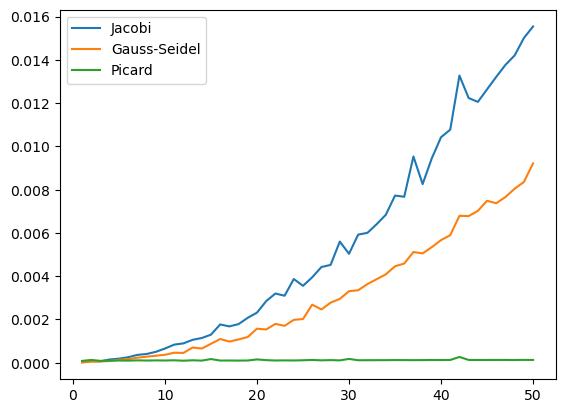

In [8]:
import matplotlib.pyplot as plt
import time as time
def Temps(N):
    T = np.zeros((N,3))
    for i in range(0,N):
        A = MatrProd(i+1,5);
        c = Vecteur(i+1);
        t = time.time()
        Jacobi(A,c,0.0000001)
        T[i,0] = time.time()-t
        t = time.time()
        Gauss_Seidel(A,c,0.0000001)
        T[i,1] = time.time()-t;
        t = time.time();
        Picard(A,c,0.0000001)
        T[i,2] = time.time()-t
    return T;
# Comparaison graphique de la rapidité des trois algorithmes
T = Temps(50)
t = np.linspace(1,50,50)
plt.plot(t,T[:,0],label='Jacobi')
plt.plot(t,T[:,1],label='Gauss-Seidel')
plt.plot(t,T[:,2],label='Picard')
plt.legend()
plt.show()

## II. La méthode d'interpolation de Hermite

1.a. Définir une fonction *Base* qui prend en entrée un entier $0 \leq i \leq N$, une liste de coefficients $X = [x_0, \ldots, x_N]$ et un nombre réel $x$, et renvoie la valeur au point $x$ du polynôme $\ell_i(X)$.

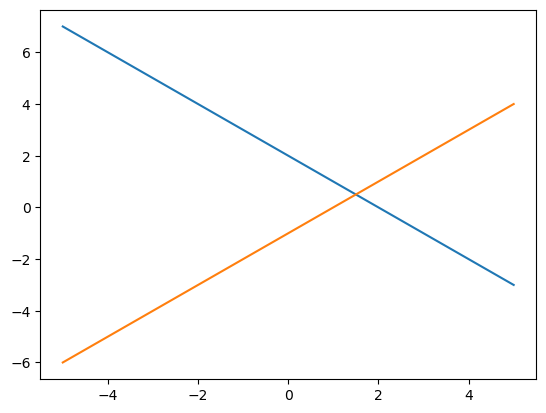

In [9]:
def Base(i, X, x):
    l = 1
    for k in range(0, len(X)):
        if k != i:
            l = l * (x - X[k])/(X[i] - X[k])
    return l
# Test de la fonction Base avec des fonctions affines
X = [1, 2]
A = np.linspace(-5,5,100)
B = []
C = []
for x in A:
    B.append(Base(0, X, x))
    C.append(Base(1, X, x))
plt.plot(A, B)
plt.plot(A, C)
plt.show()

b. Définir une fonction *DerivBase* qui prend en entrée un entier $0 \leq i \leq N$ et une liste de coefficients $X = [x_0, \ldots, x_N]$, et renvoie la valeur au point $x_i$ du polynôme dérivée $\ell_i'$.

In [10]:
def DerivBase(i, X):
    S = 0
    for k in range(0, len(X)):
        if k != i:
            S = S + 1/(X[i] - X[k])
    return S
# Test de la fonction DerivBase avec des fonctions affines
X = [1, 2]
print('DerivBase(0) =',DerivBase(0, X),'\n')
print('DerivBase(1) =',DerivBase(1, X),'\n')

DerivBase(0) = -1.0 

DerivBase(1) = 1.0 



c. Utiliser les fonctions *Base* et *DerivBase* pour définir une fonction *Hermite1* qui prend en entrée une fonction de la variable réelle $f$, sa dérivée $g$, une liste de coefficients $X = [x_0, \ldots, x_N]$ et un nombre réel $x$, et renvoie la valeur au point $x$ du polynôme d'interpolation de Hermite $H_f(X)$ aux points $x_0$, $\ldots$, et $x_N$.

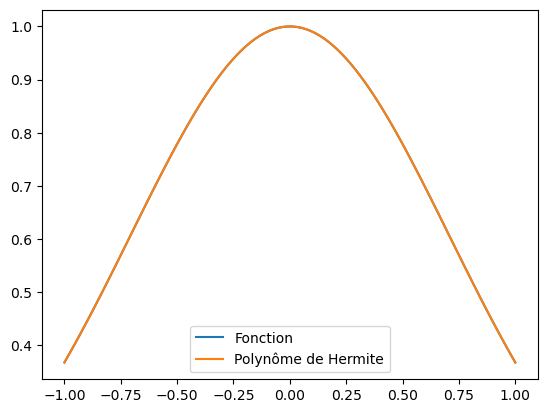

In [11]:
def Hermite1(f, g, X, x):
    S = 0
    for i in range(0, len(X)):
        S = S + Base(i,X,x)**2 * (f(X[i]) * (1 - 2 * DerivBase(i,X) * (x - X[i])) + g(X[i]) * (x - X[i]))
    return S
# Test de la fonction Hermite1 avec la fonction gaussienne
N = 6
X = []
for i in range(0, N + 1):
    X.append(- 1 + 2 * i/N)
def f(x):
    return np.exp(- x**2)
def g(x):
    return - 2 * x* np.exp(- x**2)
E = np.linspace(- 1, 1, 100)
G = f(E)
H1 = []
for e in E:
    H1.append(Hermite1(f, g, X, e))
plt.plot(E, G, label='Fonction')
plt.plot(E, H1, label='Polynôme de Hermite')
plt.legend()
plt.show()

2.a. Définir une fonction *CoeffHermite* qui prend en entrée une fonction de la variable réelle $f$, sa dérivée $g$ et une liste de coefficients $X = [x_0, \ldots, x_N]$, et renvoie les deux listes des coefficients $(\alpha_i)_{0 \leq i \leq N}$ et $(\beta_i)_{0 \leq i \leq N}$ du polynôme d'interpolation de Hermite $H_f(X)$ aux points $x_0$, $\ldots$, $x_N$.

In [12]:
def CoeffHermite(f, g, X):
    A = []
    B = []
    for k in range(0, len(X)):
        A.append(f(X[k]))
        B.append(g(X[k]))
    for i in range(0, len(X) - 1):
        for k in range(i + 1, len(X)):
            a = (A[k] - A[i] - B[i] * (X[k]- X[i]))/(X[k] - X[i])**2
            b = (B[k] - B[i])/(X[k] - X[i])**2 - 2 * (A[k] - A[i] - B[i] * (X[k]- X[i]))/(X[k] - X[i])**3
            A[k] = a
            B[k] = b
    return A,B
# Test de la fonction CoeffHermite avec une fonction polynôme
def h0(x):
    return 2 * x + 1 + (3 * (x - 1) + 4) * x**2
def h1(x):
    return 2 + 3 * x**2 + 2 * (3 * (x - 1) + 4) * x
print('Coefficients =',CoeffHermite(h0, h1, [0, 1]),'\n')

Coefficients = ([1, 4.0], [2, 3.0]) 



b. Utiliser la fonction *CoeffHermite* pour définir une fonction *Hermite2* qui prend en entrée une fonction de la variable réelle $f$, sa dérivée $g$, une liste de coefficients $X = [x_0, \ldots, x_N]$ et un nombre réel $x$, et renvoie la valeur au point $x$ du polynôme d'interpolation de Hermite $H_f(X)$ aux points $x_0$, $\ldots$, $x_N$.

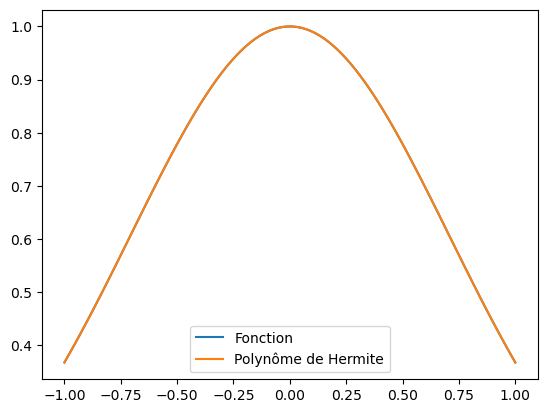

In [13]:
def Hermite2(f, g, X, x):
    A,B = CoeffHermite(f, g, X)
    S = 0
    for i in range(1, len(X) + 1):
        S = A[-i] + B[-i]*(x - X[-i]) + (x - X[-i])**2 * S
    return S
# Test de la fonction Hermite2 avec la fonction gaussienne
H2 = []
for e in E:
    H2.append(Hermite2(f, g, X, e))
plt.plot(E, G, label='Fonction')
plt.plot(E, H2, label='Polynôme de Hermite')
plt.legend()
plt.show()

3. Utiliser la définition des polynômes $(R_i)_{0 \leq i \leq N}$ pour définir une fonctions récursive *Hermite3* qui prend en entrée une fonction de la variable réelle $f$, sa dérivée $g$, une liste de coefficients $X = [x_0, \ldots, x_N]$ et un nombre réel $x$, et renvoie la valeur au point $x$ du polynôme d'interpolation de Hermite $H_f(X)$ aux points $x_0$, $\ldots$, $x_N$.

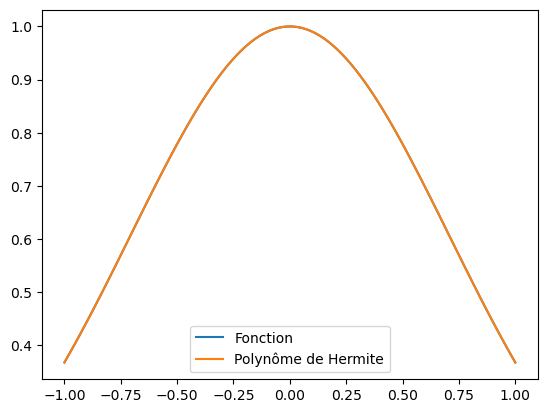

In [14]:
def Hermite3(f, g, X, x):
    y = X[0]
    S = f(y) + g(y)*(x - y)
    if len(X) == 1:
        return S
    else:
        def F(x):
            return (f(x) - f(y) - g(y) * (x - y))/(x - y)**2
        def G(x):
            return ((g(x) + g(y)) * (x - y) - 2 * (f(x) - f(y)))/(x - y)**3
        Y = X[1:]
        return S + Hermite3(F, G, Y, x) * (x - y)**2
# Test de la fonction Hermite3 avec la fonction gaussienne
H3 = []
for e in E:
    H3.append(Hermite3(f, g, X, e))
plt.plot(E, G, label='Fonction')
plt.plot(E, H3, label='Polynôme de Hermite')
plt.legend()
plt.show()

4. Comparer numériquement la rapidité des algorithmes *Hermite1*, *Hermite2* et *Hermite3*.

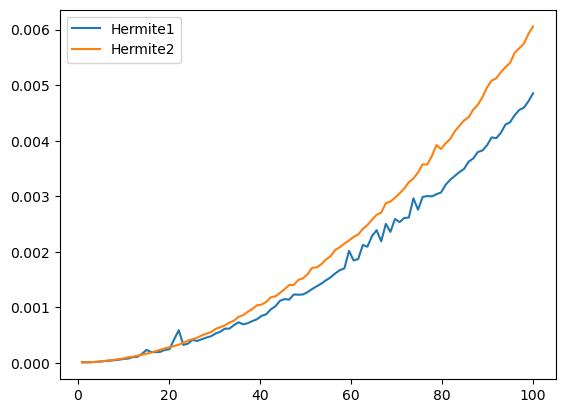

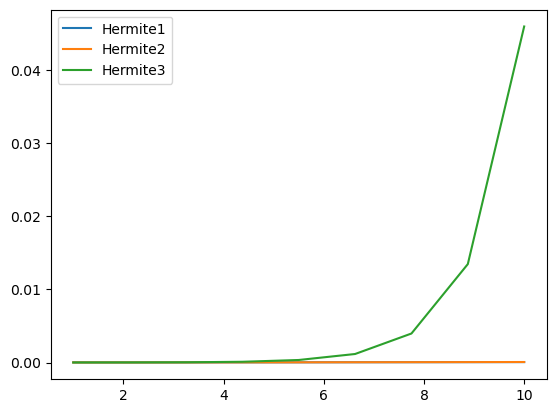

In [15]:
T1 = []
for i in range(1, 100):
    X = np.linspace(- 1, 1, i)
    t = time.time()
    Hermite1(f, g, X, 0)
    T1.append(time.time()-t)
T2 = []
for i in range(1, 100):
    X = np.linspace(- 1, 1, i)
    t = time.time()
    Hermite2(f, g, X, 0)
    T2.append(time.time()-t)
T3 = []
for i in range(1,10):
    X = np.linspace(- 1, 1, i)
    t = time.time()
    Hermite3(f, g, X, 0)
    T3.append(time.time()-t)
S1 = np.linspace(1, 100, 99)
plt.plot(S1, T1,label='Hermite1')
plt.plot(S1, T2,label='Hermite2')
plt.legend()
plt.show()
S2 = np.linspace(1, 10, 9)
plt.plot(S2, T1[:9],label='Hermite1')
plt.plot(S2, T2[:9],label='Hermite2')
plt.plot(S2, T3,label='Hermite3')
plt.legend()
plt.show()